# Fraud Detection



---
---





---

# 1. Importing Libraries and Setting Up Environment

---





In [2]:
# Import Libraries

import pandas as pd

import ast

import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression, Ridge, Lasso

from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from lightgbm import LGBMClassifier

import time

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
# Connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the Dataframe
df_original = pd.read_csv(
    '/content/drive/Othercomputers/My MacBook Pro/My_PC/City_University/Year1/Principles_of_data_science/Coursework_MINI_DataScienceProject /transactions_300k.csv'
)
df_original.head()

,transaction_id,customer_id,card_number,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,...,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,velocity_last_hour,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820+00:00,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,0,False,0,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464+00:00,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,1,True,0,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762+00:00,Grocery,physical,Whole Foods,NaN,JPY,Japan,...,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,0,False,0,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466+00:00,Gas,major,Exxon,630.60,AUD,Australia,...,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,0,False,0,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063+00:00,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,1,False,0,False,"{'num_transactions': 218, 'total_amount': 4827...",True




---


 # 2. Data Pre-processing


---



Sampling ensures the dataset is manageable in computationally constrained environments (Google Colab).

In [5]:
## sample the dataset
df = df_original.sample(n = 300000, random_state = 21).reset_index(drop = True)

In [6]:
df.head()

,transaction_id,customer_id,card_number,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,...,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,velocity_last_hour,is_fraud
0,TX_6763d922,CUST_92507,5193216967529056,2024-09-30 13:11:59.525302+00:00,Restaurant,fast_food,Wendy's,167.28,BRL,Brazil,...,Safari,web,128e56a1ef1d44db3cbf8fe41ab02f02,193.190.89.124,0,False,13,False,"{'num_transactions': 117, 'total_amount': 3298...",False
1,TX_36f455e7,CUST_41419,4258428114484904,2024-09-30 20:01:55.189466+00:00,Gas,major,BP,376698.64,NGN,Nigeria,...,NFC Payment,pos,2fe7796ad145387d06863809d421c6b1,1.97.32.79,1,False,20,False,"{'num_transactions': 572, 'total_amount': 3494...",True
2,TX_a9342c57,CUST_15520,6797471677517945,2024-10-01 02:36:10.896035+00:00,Grocery,physical,Safeway,23.55,RUB,Russia,...,Android App,mobile,303e9a4f87aae06cf46ba508c165e819,125.162.115.54,0,False,2,False,"{'num_transactions': 1214, 'total_amount': 514...",True
3,TX_ff112b0a,CUST_37272,376212534270753,2024-09-30 19:05:09.454229+00:00,Education,supplies,Chegg,241493.62,NGN,Nigeria,...,Chrome,web,89996a1c9d35b92aabee3a08e62f5d7b,191.111.29.179,0,False,19,False,"{'num_transactions': 1140, 'total_amount': 217...",False
4,TX_b31f2f76,CUST_38968,6857770496077834,2024-09-30 21:39:38.146078+00:00,Healthcare,pharmacy,Walgreens,2323.74,CAD,Canada,...,Magnetic Stripe,pos,56a69b17a75e162ec853535bad0dc02a,109.210.81.161,1,False,21,False,"{'num_transactions': 1182, 'total_amount': 108...",True


## Selective Data Loading for Optimized Processing

Dropping irrelevant columns focuses only on features essential for answering the research questions and training the models.


In [7]:
# Loading only essential columns (equivalent to dropping unnecessary columns)

# Define essential columns

essential_columns = [

    'timestamp', 'merchant_category', 'amount', 'country',

    'city_size', 'card_type', 'card_present', 'device', 'channel',

    'distance_from_home', 'high_risk_merchant', 'transaction_hour',

    'velocity_last_hour', 'is_fraud'

]

In [8]:
# Filter the dataset to include only the essential columns
df = df[essential_columns]

# Display the updated dataframe
print("\nDataset with Only Essential Columns:")
df.head()


Dataset with Only Essential Columns:


,timestamp,merchant_category,amount,country,city_size,card_type,card_present,device,channel,distance_from_home,high_risk_merchant,transaction_hour,velocity_last_hour,is_fraud
0,2024-09-30 13:11:59.525302+00:00,Restaurant,167.28,Brazil,medium,Basic Credit,False,Safari,web,0,False,13,"{'num_transactions': 117, 'total_amount': 3298...",False
1,2024-09-30 20:01:55.189466+00:00,Gas,376698.64,Nigeria,medium,Basic Credit,True,NFC Payment,pos,1,False,20,"{'num_transactions': 572, 'total_amount': 3494...",True
2,2024-10-01 02:36:10.896035+00:00,Grocery,23.55,Russia,medium,Basic Debit,False,Android App,mobile,0,False,2,"{'num_transactions': 1214, 'total_amount': 514...",True
3,2024-09-30 19:05:09.454229+00:00,Education,241493.62,Nigeria,medium,Gold Credit,False,Chrome,web,0,False,19,"{'num_transactions': 1140, 'total_amount': 217...",False
4,2024-09-30 21:39:38.146078+00:00,Healthcare,2323.74,Canada,medium,Platinum Credit,True,Magnetic Stripe,pos,1,False,21,"{'num_transactions': 1182, 'total_amount': 108...",True


# Exploratory Data Analysis (EDA)


In [9]:
# Check the shape and structure of the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (300000, 14)


In [10]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   timestamp           300000 non-null  object 
 1   merchant_category   300000 non-null  object 
 2   amount              299997 non-null  float64
 3   country             300000 non-null  object 
 4   city_size           300000 non-null  object 
 5   card_type           299995 non-null  object 
 6   card_present        300000 non-null  bool   
 7   device              300000 non-null  object 
 8   channel             300000 non-null  object 
 9   distance_from_home  300000 non-null  int64  
 10  high_risk_merchant  300000 non-null  bool   
 11  transaction_hour    300000 non-null  int64  
 12  velocity_last_hour  300000 non-null  object 
 13  is_fraud            300000 non-null  bool   
dtypes: bool(3), float64(1), int64(2), object(8)
memory usage: 26.0+ MB
No

The describe() function provides a statistical summary of the numerical columns in the dataset

In [11]:
# Statistical summary of the numerical columns in a dataset

print("\nDataset Description:")
print(df.describe())


Dataset Description:
             amount  distance_from_home  transaction_hour
count  2.999970e+05       300000.000000     300000.000000
mean   5.223205e+04            0.358393         10.434593
std    1.924683e+05            0.479529          6.902153
min    1.000000e-02            0.000000          0.000000
25%    3.611800e+02            0.000000          4.000000
50%    1.257950e+03            0.000000         10.000000
75%    2.407306e+04            1.000000         17.000000
max    6.155868e+06            1.000000         23.000000





*   **"amount"**: Transaction amounts vary widely, with a mean of 52,232 and a median of 1,257, indicating the presence of outliers (very large transactions).
*   **"distance_from_home"**: Most transactions occur near the cardholder's home, as the median is 0.
*   **"transaction_hour"**: Transactions are distributed throughout the day, with a median of 10, suggesting mid-morning activity.















# Handling Missing Values

In [12]:
# Identify null values

print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
timestamp             0
merchant_category     0
amount                3
country               0
city_size             0
card_type             5
card_present          0
device                0
channel               0
distance_from_home    0
high_risk_merchant    0
transaction_hour      0
velocity_last_hour    0
is_fraud              0
dtype: int64


We applied imputation techniques to handle missing values in the dataset:




*  For numerical features (**amount**), we used the median.
*  For categorical features (**card_present**), we used the mode.








In [13]:
import pandas as pd

# Fill missing values for 'amount' (numerical column) with the median
df['amount'].fillna(df['amount'].median(), inplace=True)

# Fill missing values for 'card_type' (categorical column) with the mode
df['card_type'].fillna(df['card_type'].mode()[0], inplace=True)

# Check the result
print(df.isnull().sum())  # To verify that there are no missing values left


<ipython-input-13-89a4d57bbea6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['amount'].fillna(df['amount'].median(), inplace=True)
<ipython-input-13-89a4d57bbea6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

timestamp             0
merchant_category     0
amount                0
country               0
city_size             0
card_type             0
card_present          0
device                0
channel               0
distance_from_home    0
high_risk_merchant    0
transaction_hour      0
velocity_last_hour    0
is_fraud              0
dtype: int64


## Normalizing Numerical Features

We normalize numerical features to ensure consistent scaling and improve model performance.

## Date-Time Handling & Creating New Features



*   We convert the timestamp column (e.g., 2024-09-30 13:11:59.525302+00:00) into separate features: year, month, day, day of the week, hour, minute, second, and microsecond.
*   These new features will help in analyzing time-based patterns, like peak transaction hours or daily trends. After extraction, the original timestamp column is removed.



In [14]:
## Convert timestamp column into different data type
df['timestamp'] = pd.to_datetime(df['timestamp'], format='ISO8601')


## Extract year, month, day, etc.

def modify_timestamp():
    df['year'] = df['timestamp'].dt.year
    df['month'] = df['timestamp'].dt.month
    df['day'] = df['timestamp'].dt.day
    df['day_of_week'] = df['timestamp'].dt.day_name()
    df['hour'] = df['timestamp'].dt.hour
    df['minute'] = df['timestamp'].dt.minute
    df['second'] = df['timestamp'].dt.second
    df['microsecond'] = df['timestamp'].dt.microsecond
    df.drop('timestamp', axis = 1, inplace = True)

modify_timestamp()

In [15]:
df.head()

,merchant_category,amount,country,city_size,card_type,card_present,device,channel,distance_from_home,high_risk_merchant,...,velocity_last_hour,is_fraud,year,month,day,day_of_week,hour,minute,second,microsecond
0,Restaurant,167.28,Brazil,medium,Basic Credit,False,Safari,web,0,False,...,"{'num_transactions': 117, 'total_amount': 3298...",False,2024,9,30,Monday,13,11,59,525302
1,Gas,376698.64,Nigeria,medium,Basic Credit,True,NFC Payment,pos,1,False,...,"{'num_transactions': 572, 'total_amount': 3494...",True,2024,9,30,Monday,20,1,55,189466
2,Grocery,23.55,Russia,medium,Basic Debit,False,Android App,mobile,0,False,...,"{'num_transactions': 1214, 'total_amount': 514...",True,2024,10,1,Tuesday,2,36,10,896035
3,Education,241493.62,Nigeria,medium,Gold Credit,False,Chrome,web,0,False,...,"{'num_transactions': 1140, 'total_amount': 217...",False,2024,9,30,Monday,19,5,9,454229
4,Healthcare,2323.74,Canada,medium,Platinum Credit,True,Magnetic Stripe,pos,1,False,...,"{'num_transactions': 1182, 'total_amount': 108...",True,2024,9,30,Monday,21,39,38,146078




---



# 3. Feature Engineering



---



 ## Expand Nested Features



*   The **"velocity_last_hour"** feature contains information about transaction activity in the last hour, stored as a dictionary with fields like num_transactions, total_amount, unique_merchants, unique_countries, and max_single_amount.
*   We expand this nested feature by converting it into individual columns for each field using ast.literal_eval().
*   After creating these new columns, we drop the original **"velocity_last_hour"** and the **"transaction_hour"** columns, as the hour information has already been extracted from the timestamp.









In [16]:
print(type(df['velocity_last_hour'][0]))


<class 'str'>


In [17]:
import ast

df['velocity_last_hour'] = df['velocity_last_hour'].apply(ast.literal_eval)


In [18]:
print(type(df['velocity_last_hour'][0]))  # Should now be <class 'dict'>


<class 'dict'>


In [19]:
# Extract Fields from velocity_last_hour

velocity_fields = ['num_transactions', 'total_amount', 'unique_merchants', 'unique_countries', 'max_single_amount']

# Create separate columns for each field
for field in velocity_fields:
    df[field] = df['velocity_last_hour'].apply(lambda x: x[field])


In [20]:
# Print encoded categorical columns to confirm
print("\nNormalised numerical features")
df.head()


Normalised numerical features


,merchant_category,amount,country,city_size,card_type,card_present,device,channel,distance_from_home,high_risk_merchant,...,day_of_week,hour,minute,second,microsecond,num_transactions,total_amount,unique_merchants,unique_countries,max_single_amount
0,Restaurant,167.28,Brazil,medium,Basic Credit,False,Safari,web,0,False,...,Monday,13,11,59,525302,117,3.298092e+06,67,9,1.494592e+06
1,Gas,376698.64,Nigeria,medium,Basic Credit,True,NFC Payment,pos,1,False,...,Monday,20,1,55,189466,572,3.494214e+07,102,12,4.088177e+06
2,Grocery,23.55,Russia,medium,Basic Debit,False,Android App,mobile,0,False,...,Tuesday,2,36,10,896035,1214,5.143700e+07,105,12,1.685346e+06
3,Education,241493.62,Nigeria,medium,Gold Credit,False,Chrome,web,0,False,...,Monday,19,5,9,454229,1140,2.170478e+08,105,12,5.780333e+06
4,Healthcare,2323.74,Canada,medium,Platinum Credit,True,Magnetic Stripe,pos,1,False,...,Monday,21,39,38,146078,1182,1.081646e+08,105,12,1.661306e+06


In [21]:
# removed the nested feature as we have explanded it to multiple columns.
df = df.drop(columns=['velocity_last_hour'])

# removed 'transaction_hour' as we have already extracted hour from timestamp
df = df.drop(columns=['transaction_hour'])



# Feature Transformation

In [22]:
# save the original Dataframe into a copy df before the feature transformation
df_copy = df.copy(deep=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   merchant_category   300000 non-null  object 
 1   amount              300000 non-null  float64
 2   country             300000 non-null  object 
 3   city_size           300000 non-null  object 
 4   card_type           300000 non-null  object 
 5   card_present        300000 non-null  bool   
 6   device              300000 non-null  object 
 7   channel             300000 non-null  object 
 8   distance_from_home  300000 non-null  int64  
 9   high_risk_merchant  300000 non-null  bool   
 10  is_fraud            300000 non-null  bool   
 11  year                300000 non-null  int32  
 12  month               300000 non-null  int32  
 13  day                 300000 non-null  int32  
 14  day_of_week         300000 non-null  object 
 15  hour                300000 non-nul

## Converting categorical columns to numerical

In [23]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Convert categorical columns to numerical
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

 ## Coverting boolean columns to O/1

In [24]:
## Convert Boolean values into int

# Select columns with boolean data type from the DataFrame
bool_columns = df.select_dtypes('bool').columns

# Loop through each boolean column and convert it to integer (0 for False, 1 for True)
for column in bool_columns:
    df[column] = df[column].astype('int')

# Display the first few rows of the updated DataFrame
df.head()


,merchant_category,amount,country,city_size,card_type,card_present,device,channel,distance_from_home,high_risk_merchant,...,day_of_week,hour,minute,second,microsecond,num_transactions,total_amount,unique_merchants,unique_countries,max_single_amount
0,5,167.28,1,1,0,0,7,2,0,0,...,0,13,11,59,525302,117,3.298092e+06,67,9,1.494592e+06
1,2,376698.64,7,1,0,1,6,1,1,0,...,0,20,1,55,189466,572,3.494214e+07,102,12,4.088177e+06
2,3,23.55,8,1,1,0,0,0,0,0,...,1,2,36,10,896035,1214,5.143700e+07,105,12,1.685346e+06
3,0,241493.62,7,1,2,0,2,2,0,0,...,0,19,5,9,454229,1140,2.170478e+08,105,12,5.780333e+06
4,4,2323.74,2,1,3,1,5,1,1,0,...,0,21,39,38,146078,1182,1.081646e+08,105,12,1.661306e+06


In [25]:
# Alternative code for convering Categorical to Numeric using 'one-hot' encoding

# ## Perform One-Hot Encoding on categorical variables
# df_onehot = pd.get_dummies(df, dtype = 'int')

# df_onehot.head()




---



# 4. Data Visualization




---



## Research Question 1:
## What transaction features (e.g., amount, type, location, channel) have the highest correlation with fraudulent activity, and how can they be used to predict fraud?
- (This identifies key risk factors contributing to fraud based on customer and transaction details.)


In [26]:
print(df.dtypes)


merchant_category       int64
amount                float64
country                 int64
city_size               int64
card_type               int64
card_present            int64
device                  int64
channel                 int64
distance_from_home      int64
high_risk_merchant      int64
is_fraud                int64
year                    int32
month                   int32
day                     int32
day_of_week             int64
hour                    int32
minute                  int32
second                  int32
microsecond             int32
num_transactions        int64
total_amount          float64
unique_merchants        int64
unique_countries        int64
max_single_amount     float64
dtype: object



 ## Fraud vs Non-Fraud Transactions (Pie Chart)


*    It shows the overall proportion of fraudulent and non-fraudulent transactions.
*   It gives an immediate, high-level view of the dataset's balance and highlights the importance of identifying fraudulent transactions.







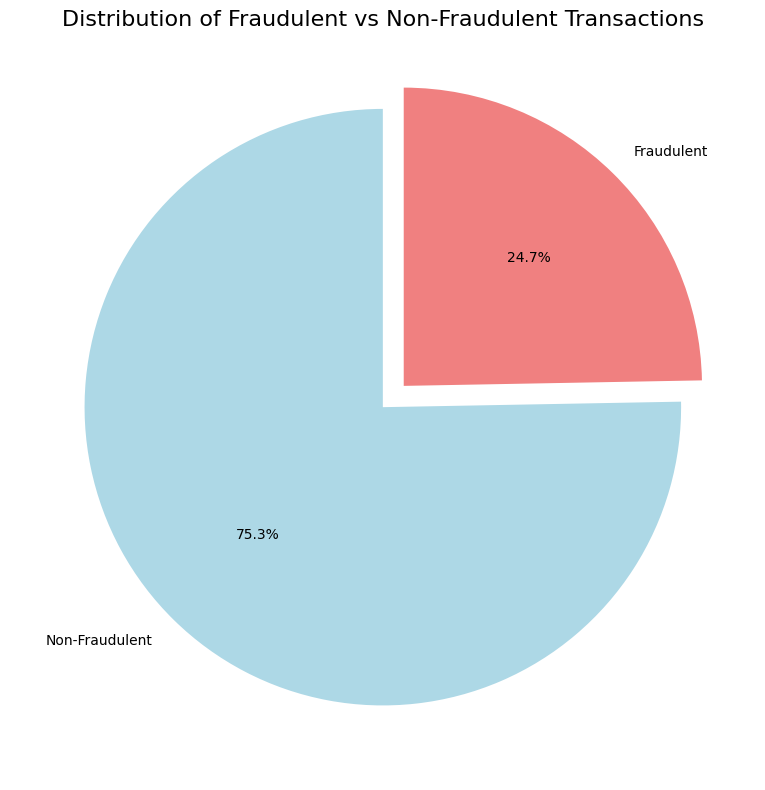

In [27]:
# Count the number of fraud and non-fraud transactions
fraud_counts = df["is_fraud"].value_counts()

# Define labels and colors for the pie chart
labels = ["Non-Fraudulent", "Fraudulent"]
colors = ["lightblue", "lightcoral"]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    fraud_counts,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=(0, 0.1)  # Slightly explode the "Fraudulent" slice for emphasis
)

# Add a title
plt.title("Distribution of Fraudulent vs Non-Fraudulent Transactions", fontsize=16)

# Display the chart
plt.tight_layout()
plt.savefig("fraud_vs_nonfraud_piechart.png")
plt.show()


## Correlation Analysis for Numerical Features: (Correlation Matrix)



*   To understand how numerical features are related to fraud and identify key features that might help distinguish fraud from legitimate transactions.
*   It reveals how numerical features such as distance from home, transaction amount, and card presence correlate with fraud. This insight guides further analysis.



In [28]:
numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32'])

# remove year as the data is all 2024
numeric_df.drop('year', axis=1, inplace=True)

corr_matrix = numeric_df.corr()


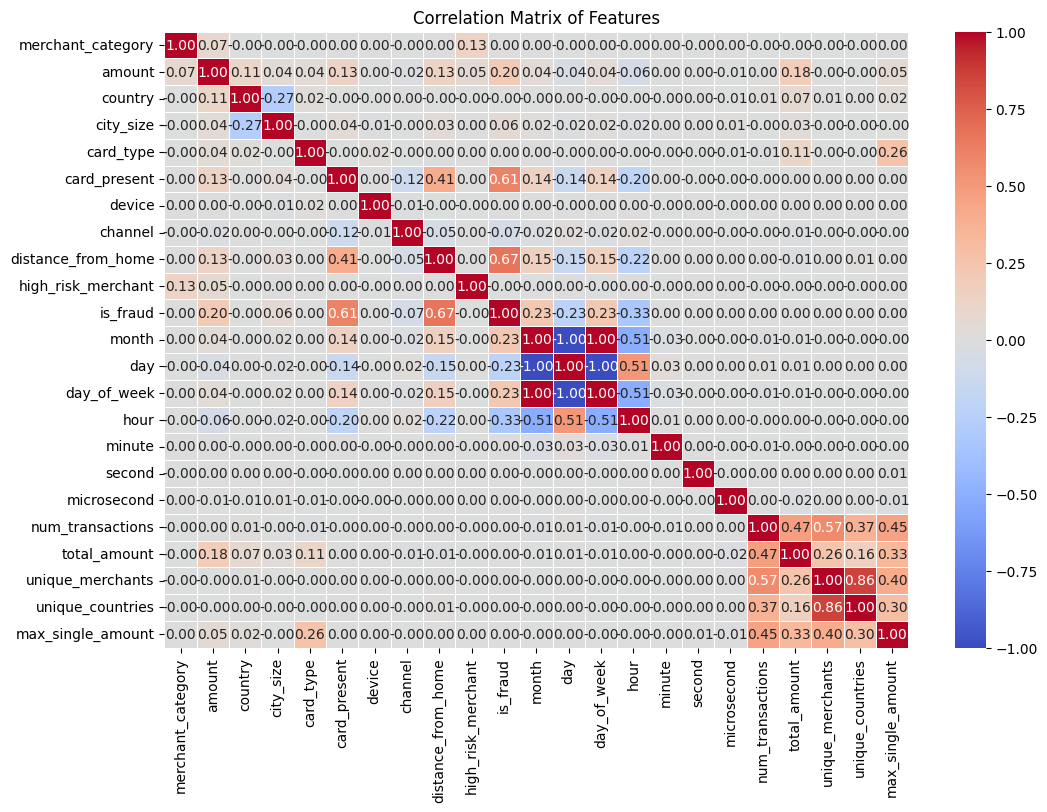

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

#Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()




*   The heatmap shows the correlation between features and fraudulent activity (is_fraud). Key features with high absolute correlations include distance_from_home, card_present.


*   distance_from_home (0.67): Transactions made farther from the user's usual location are strongly associated with fraud.
*   card_present (0.61): Card-present transactions (likely in-store) are less likely to be fraudulent compared to card-not-present transactions.
*   amount (0.20): Larger transaction amounts are slightly more likely to be fraudulent, though the correlation is not as strong.








In [30]:
# Top Correlations with Fraud
fraud_corr = corr_matrix["is_fraud"].sort_values(ascending=False)
print("Top Features Correlated with Fraud:\n", fraud_corr)

Top Features Correlated with Fraud:
 is_fraud              1.000000
distance_from_home    0.667348
card_present          0.607437
day_of_week           0.226351
month                 0.226351
amount                0.201556
city_size             0.057676
max_single_amount     0.002717
minute                0.002464
device                0.002263
card_type             0.001701
microsecond           0.001642
total_amount          0.001557
merchant_category     0.001157
unique_merchants      0.000896
unique_countries      0.000804
second                0.000078
num_transactions      0.000074
high_risk_merchant   -0.000933
country              -0.002319
channel              -0.069272
day                  -0.226351
hour                 -0.327245
Name: is_fraud, dtype: float64


##  Scatter Plot for Detailed Feature Exploration: (Amount vs Max Single Amount)




*   To visualize the relationship between the transaction amount and maximum transaction in the last hour, helping understand how these factors correlate with fraud, e.i whether there’s a linear relationship with fraud.

*   This step allows us to explore the features identified in the correlation matrix, validating or refining our hypotheses about fraudulent transactions.









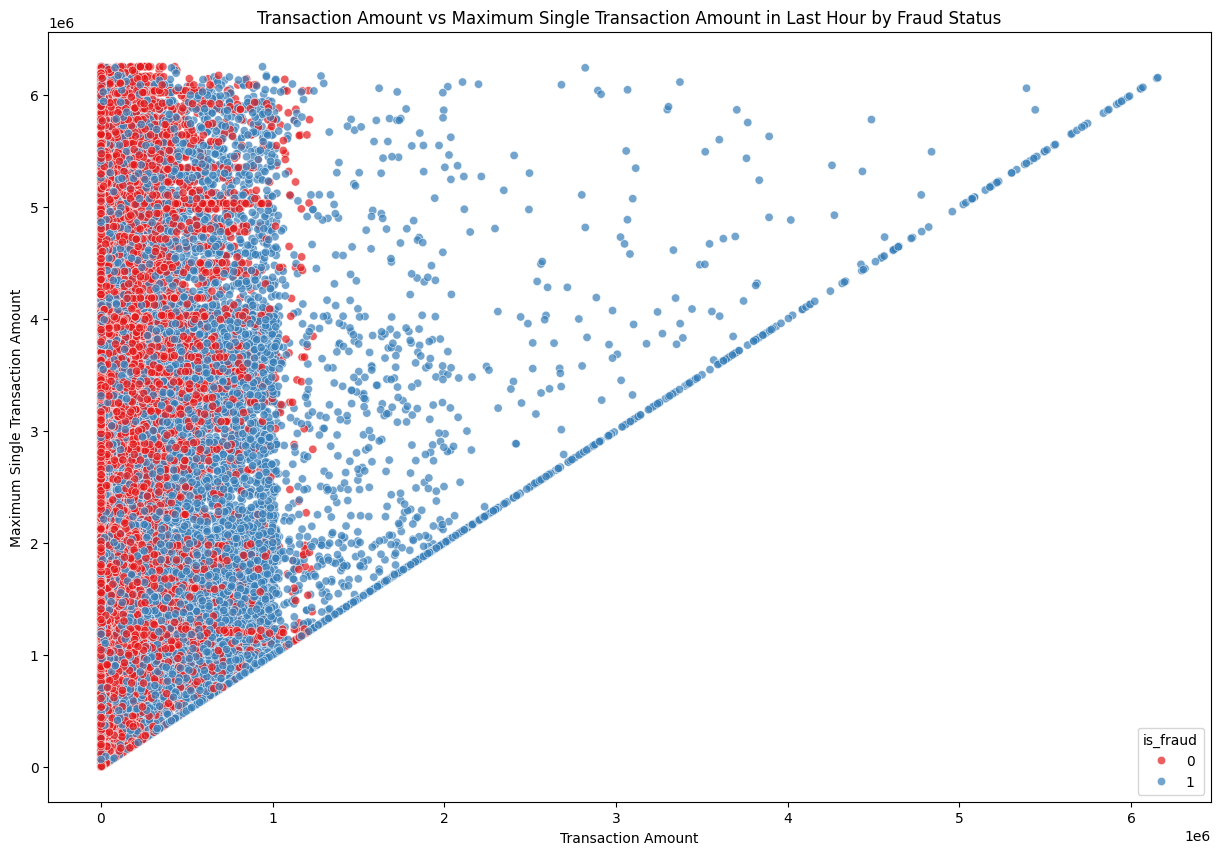

In [31]:
# Set the figure size for the scatter plot
plt.figure(figsize=(15, 10))

# Create scatter plot to visualize relationship between 'amount' and 'max_single_amount'
sns.scatterplot(data=df, x='amount', y='max_single_amount', hue='is_fraud', alpha=0.7, palette='Set1')

# Set plot title and labels for clarity
plt.title('Transaction Amount vs Maximum Single Transaction Amount in Last Hour by Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Maximum Single Transaction Amount')

# Display the plot
plt.show()




*   From the above graph, there’s no clear linear relationship between the
max amount (in the last hour) and the transaction amount. While a slight linear trend exists, many points deviate, indicating a non-linear relationship. This suggests that other factors may influence fraud more strongly, and the connection between these features is more complex than initially thought. This warrants further exploration to better understand the dynamics of fraud.





## Exploring Distance from Home Distribution: (Distribution Plot)



*    To understand how far transactions typically occur from the user’s home, and how this might relate to fraudulent activity.
*  It builds on insights from the correlation matrix to show how distance from home impacts fraud likelihood.



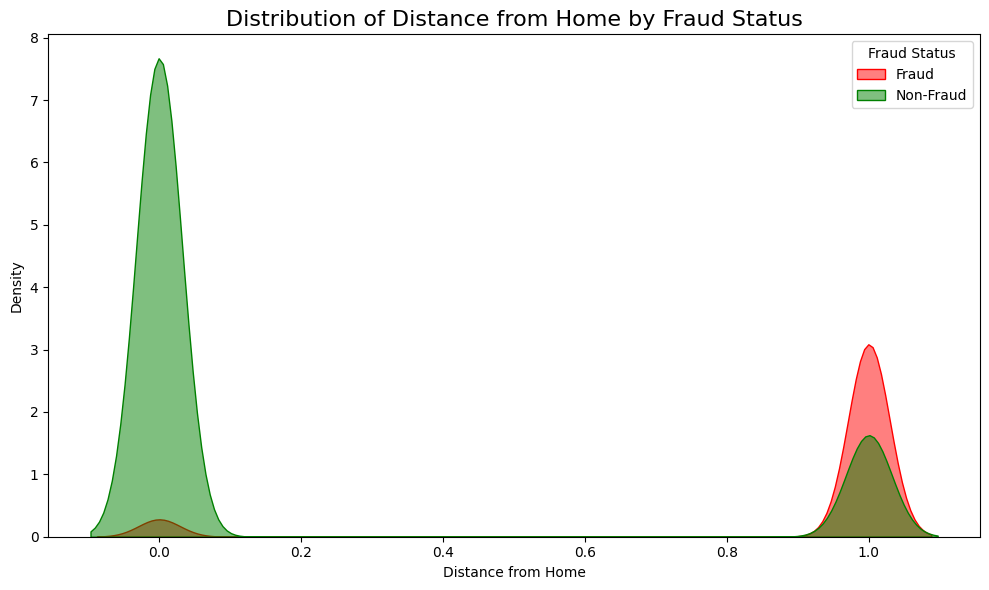

In [32]:
# 1. Distribution Plot: Distance from Home
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df, x="distance_from_home", hue="is_fraud",
    fill=True, palette={0: "green", 1: "red"}, alpha=0.5
)
plt.title("Distribution of Distance from Home by Fraud Status", fontsize=16)
plt.xlabel("Distance from Home")
plt.ylabel("Density")
plt.legend(["Fraud", "Non-Fraud"], title="Fraud Status")
plt.tight_layout()
plt.savefig("distance_from_home_fraud.png")
plt.show()



*   From the distribution plot above, we can observe that fraud tends to increase as the transaction distance from home increases, while transactions closer to home are less likely to be fraudulent.

## Correlation Analysis for Categorical Features



*   After exploring the relationships between the numerical features and fraud, we now shift focus to the categorical features.
*   To enable further analysis, I first converted these categorical features into numerical values using One-Hot Encoding.
* Once the features were transformed, I calculated the correlation matrix to identify which features are most strongly correlated with fraud.


After calculating the correlation matrix for numerical features, we noticed that the correlation for categorical features was sparse or empty, as categorical variables typically have low correlation with each other in their raw form.

To better understand the relationship between categorical features and fraud (is_fraud), we used the correlation matrix to:


*   List item
*   List item





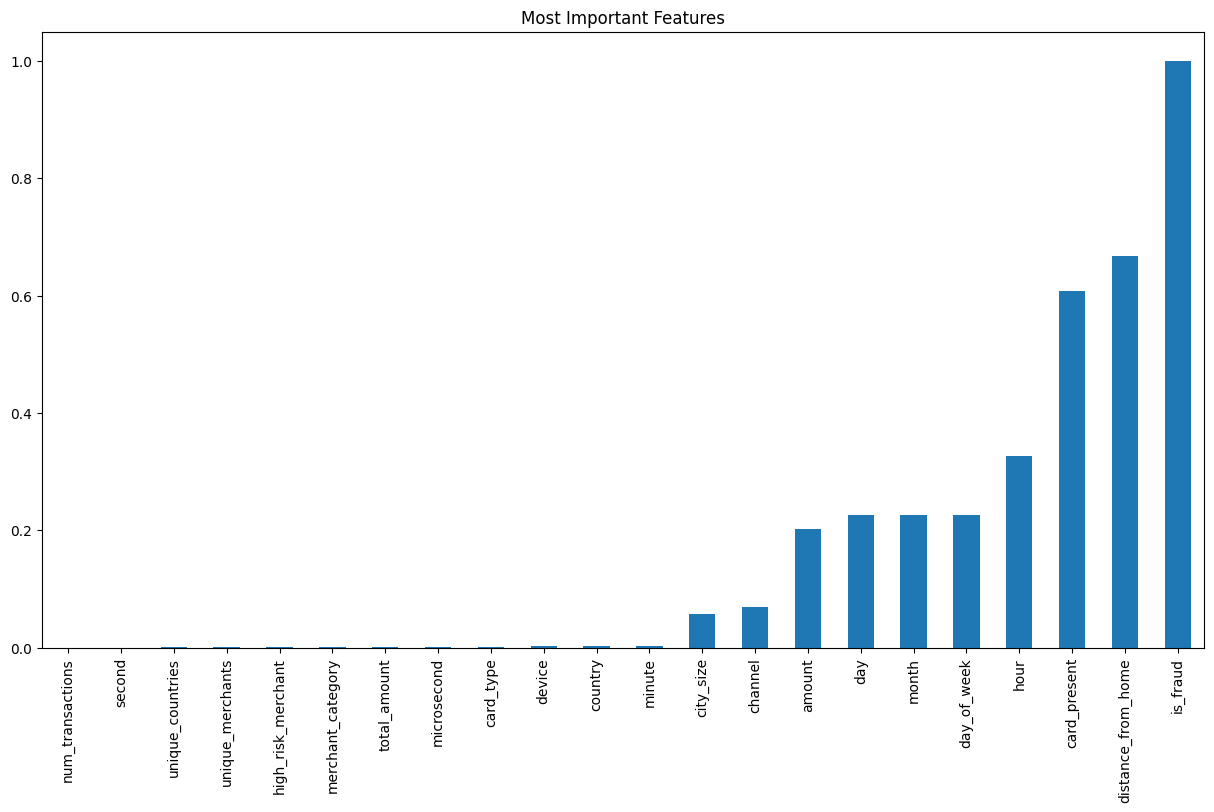

In [33]:
# Select features with a correlation threshold greater than 0.25 for 'is_fraud'
plt.figure(figsize=(15, 8))

# Plot the absolute correlation values of each feature with 'is_fraud', excluding the last row (self-correlation)
correlation_with_fraud = corr_matrix['is_fraud'][:-1].abs().sort_values()

# Create a bar plot of the features' correlation with 'is_fraud'
correlation_with_fraud.plot(kind='bar', title='Most Important Features')

# Display the plot
plt.show()


In [34]:
## Select only 20 important features into list
important_features = corr_matrix['is_fraud'][:-1].abs().sort_values().tail(20)
selected_feature_cols = important_features.index.tolist()

selected_feature_cols

['unique_countries',
 'unique_merchants',
 'high_risk_merchant',
 'merchant_category',
 'total_amount',
 'microsecond',
 'card_type',
 'device',
 'country',
 'minute',
 'city_size',
 'channel',
 'amount',
 'day',
 'month',
 'day_of_week',
 'hour',
 'card_present',
 'distance_from_home',
 'is_fraud']

In [35]:
df.head()

,merchant_category,amount,country,city_size,card_type,card_present,device,channel,distance_from_home,high_risk_merchant,...,day_of_week,hour,minute,second,microsecond,num_transactions,total_amount,unique_merchants,unique_countries,max_single_amount
0,5,167.28,1,1,0,0,7,2,0,0,...,0,13,11,59,525302,117,3.298092e+06,67,9,1.494592e+06
1,2,376698.64,7,1,0,1,6,1,1,0,...,0,20,1,55,189466,572,3.494214e+07,102,12,4.088177e+06
2,3,23.55,8,1,1,0,0,0,0,0,...,1,2,36,10,896035,1214,5.143700e+07,105,12,1.685346e+06
3,0,241493.62,7,1,2,0,2,2,0,0,...,0,19,5,9,454229,1140,2.170478e+08,105,12,5.780333e+06
4,4,2323.74,2,1,3,1,5,1,1,0,...,0,21,39,38,146078,1182,1.081646e+08,105,12,1.661306e+06


In [36]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   merchant_category   300000 non-null  object 
 1   amount              300000 non-null  float64
 2   country             300000 non-null  object 
 3   city_size           300000 non-null  object 
 4   card_type           300000 non-null  object 
 5   card_present        300000 non-null  bool   
 6   device              300000 non-null  object 
 7   channel             300000 non-null  object 
 8   distance_from_home  300000 non-null  int64  
 9   high_risk_merchant  300000 non-null  bool   
 10  is_fraud            300000 non-null  bool   
 11  year                300000 non-null  int32  
 12  month               300000 non-null  int32  
 13  day                 300000 non-null  int32  
 14  day_of_week         300000 non-null  object 
 15  hour                300000 non-nul

['merchant_category', 'country', 'city_size', 'card_type', 'device', 'channel']


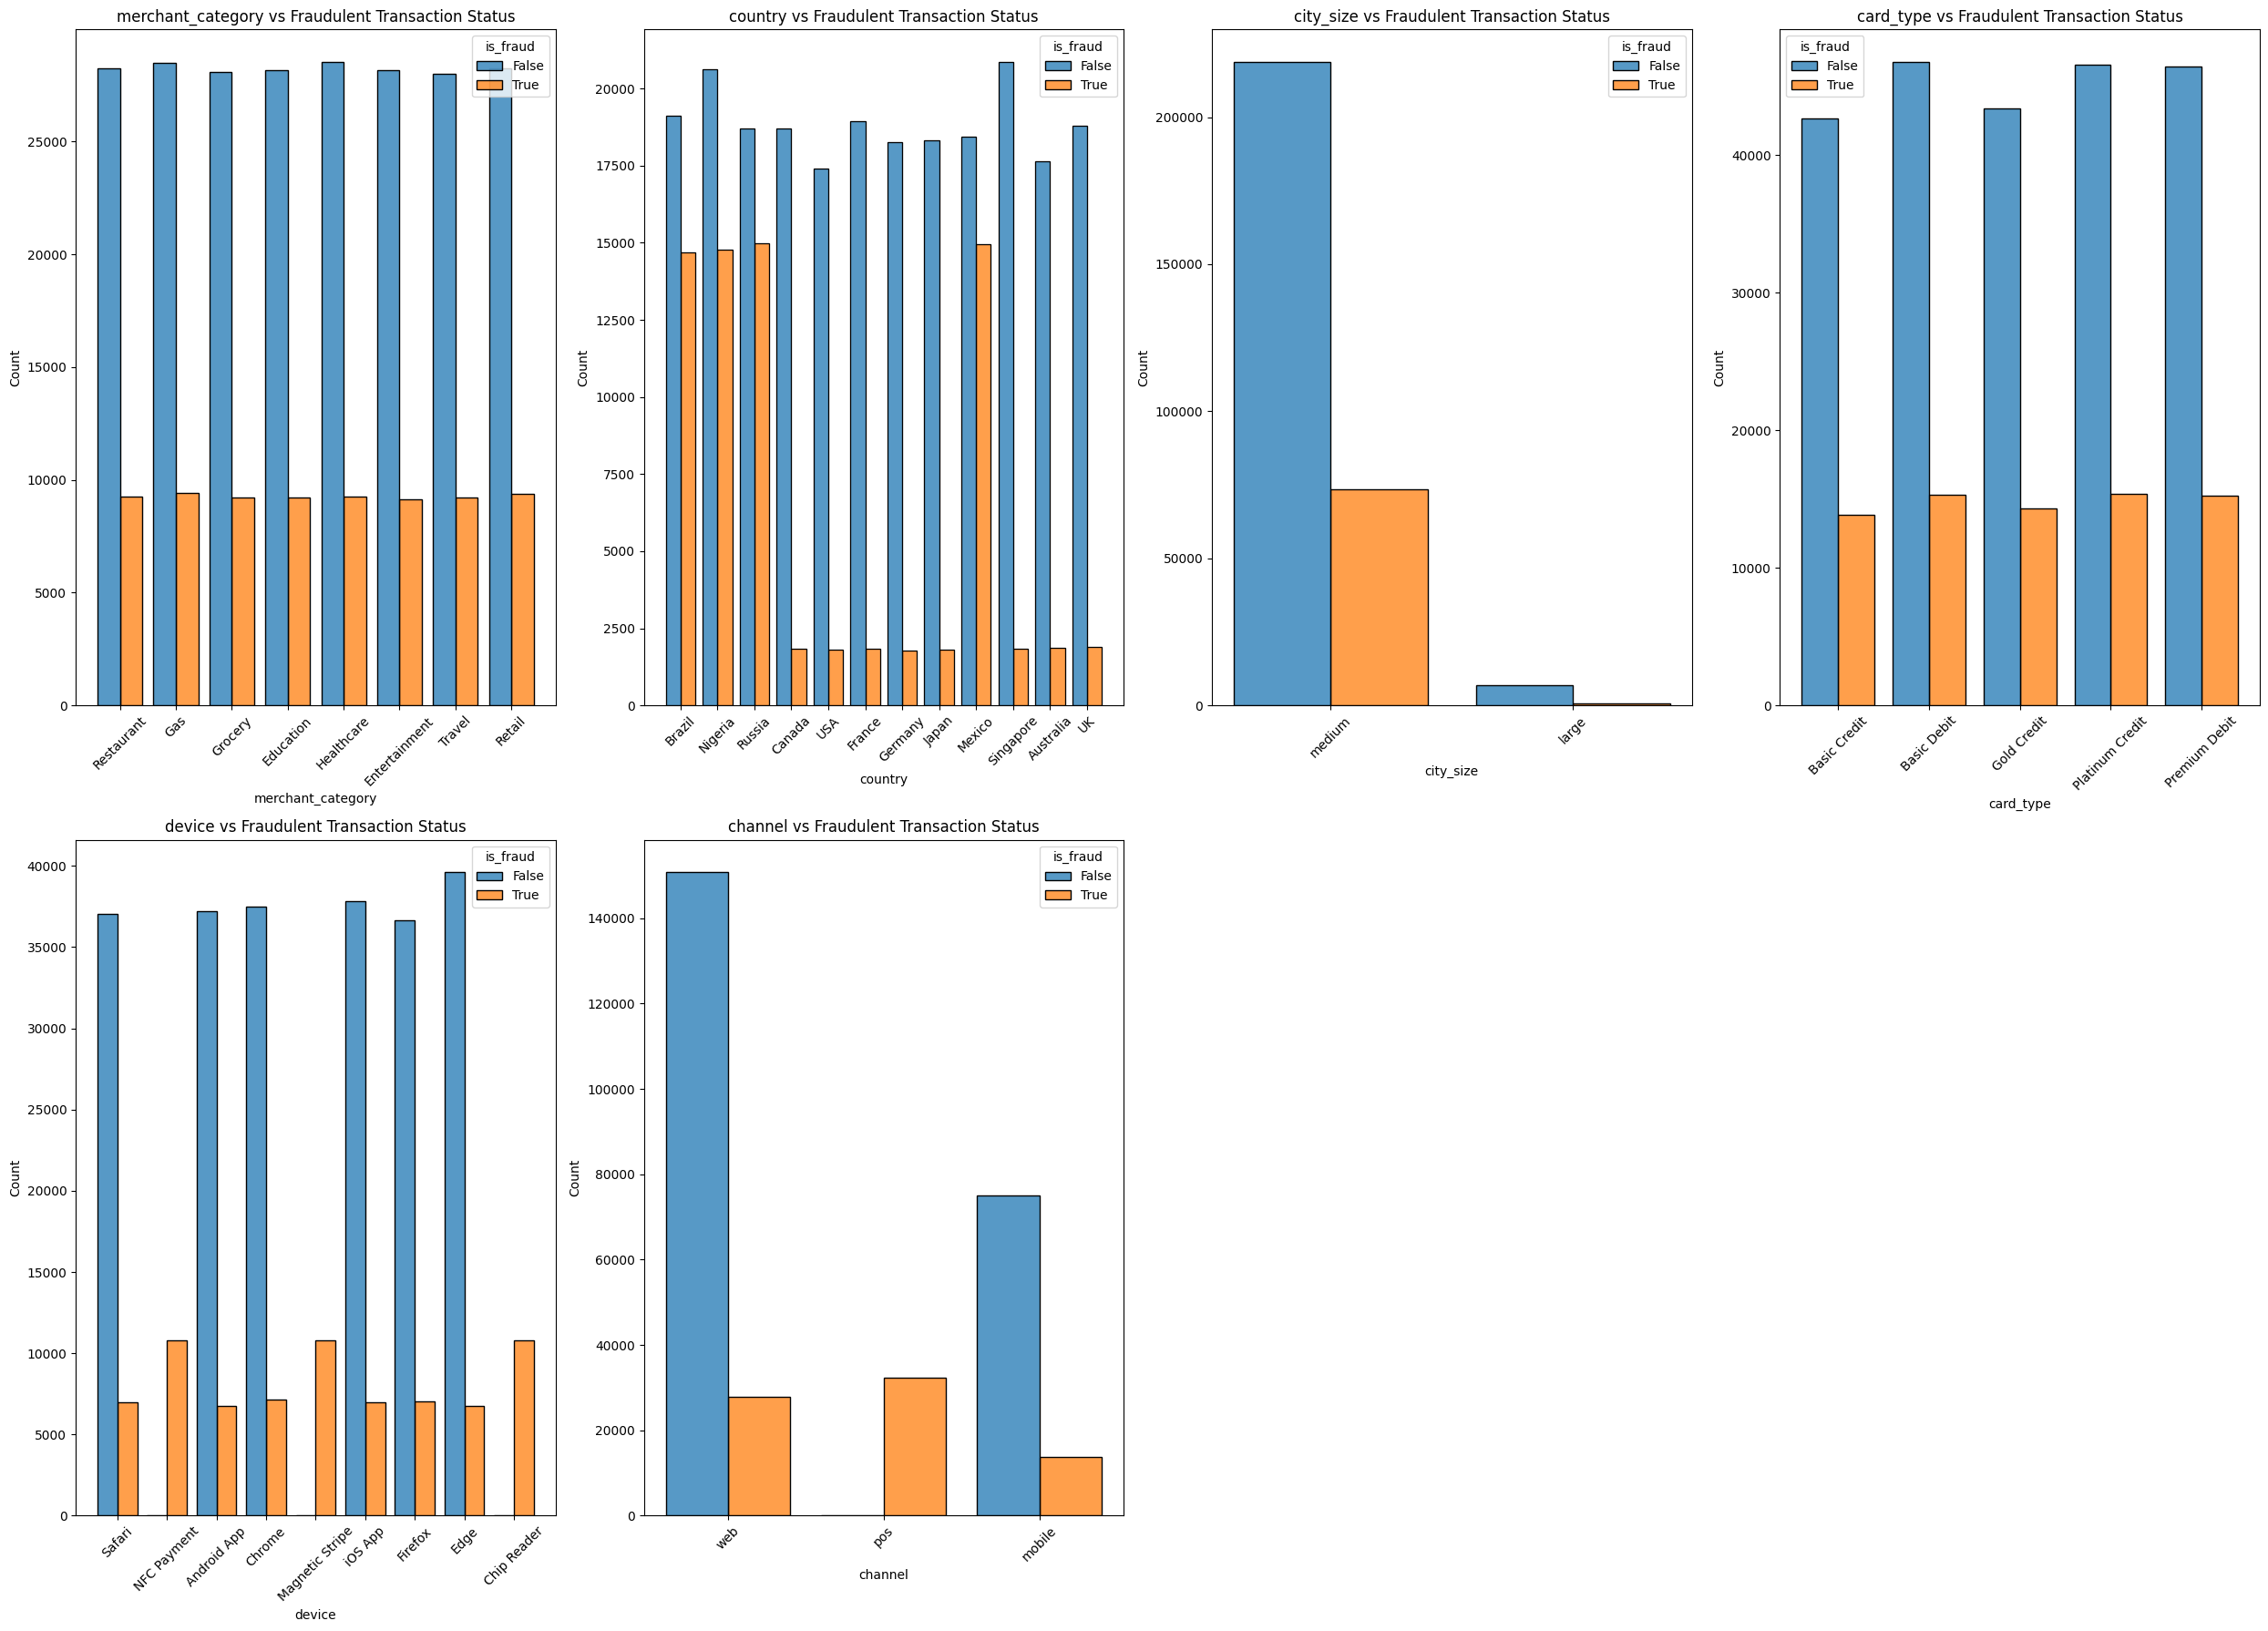

In [37]:
# Extract categorical feature columns
# Use the df_copy DF here as it still has the categorical features

cat_feature_cols = list(df_copy.select_dtypes('object').columns)
cat_feature_cols.remove('day_of_week')  # Exclude 'day_of_week' from the list
print(cat_feature_cols)

# Define grid size for subplots
columns_per_row = 4
rows_needed = len(cat_feature_cols) // columns_per_row + 1

# Create subplots
fig, subplot_axes = plt.subplots(rows_needed, columns_per_row, figsize=(25, 18))
subplot_axes = subplot_axes.flatten()  # Flatten axes for easier access

# Plot histograms for each categorical feature
for index, feature in enumerate(cat_feature_cols):
    sns.histplot(data=df_copy, x=feature, hue='is_fraud', multiple='dodge', shrink=0.8, ax=subplot_axes[index])
    subplot_axes[index].set_title(f'{feature} vs Fraudulent Transaction Status')
    subplot_axes[index].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Remove extra subplots if any
for extra_subplot in range(index + 1, len(subplot_axes)):
    fig.delaxes(subplot_axes[extra_subplot])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [38]:
# Filter data for specific countries with higher proportion of fraudulent transactions
target_countries = ['Russia', 'Nigeria', 'Mexico', 'Brazil']
filtered_data = df_copy[df_copy['country'].isin(target_countries)]

# Group by country and fraud status, and calculate the median transaction amount
country_fraud_stats = filtered_data.groupby(['country', 'is_fraud'])['amount'].median().reset_index()

# Display the result
country_fraud_stats


,country,is_fraud,amount
0,Brazil,False,2089.150
1,Brazil,True,3634.075
2,Mexico,False,8243.160
3,Mexico,True,14736.870
4,Nigeria,False,175375.400
5,Nigeria,True,313018.910
6,Russia,False,31153.350
7,Russia,True,55971.200


<ipython-input-39-e7d069a2f38d>:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=df_copy, x='country', y='amount', hue='is_fraud', palette=sns.color_palette("viridis"))


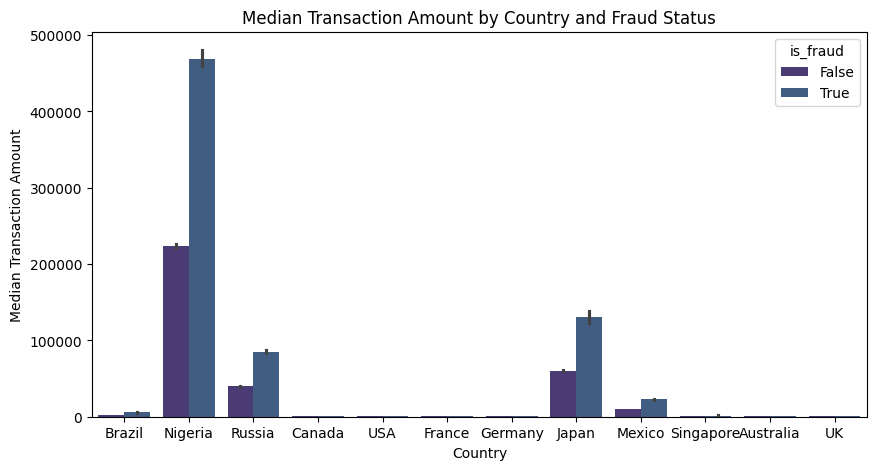

In [39]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Create a bar plot comparing the median transaction amounts by country, with fraud status as the hue
sns.barplot(data=df_copy, x='country', y='amount', hue='is_fraud', palette=sns.color_palette("viridis"))

# Set the title of the plot
plt.title('Median Transaction Amount by Country and Fraud Status')

# Set the label for the x-axis (Country)
plt.xlabel('Country')

# Set the label for the y-axis (Median Transaction Amount)
plt.ylabel('Median Transaction Amount')

# Display the plot
plt.show()


Number of abnormal transactions in Brazil: 12967


<ipython-input-40-18c9d83ef616>:21: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=tmp_data, x=col, y='count', hue='is_fraud', palette=sns.color_palette('mako'), ax=axes[i])
<ipython-input-40-18c9d83ef616>:21: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=tmp_data, x=col, y='count', hue='is_fraud', palette=sns.color_palette('mako'), ax=axes[i])


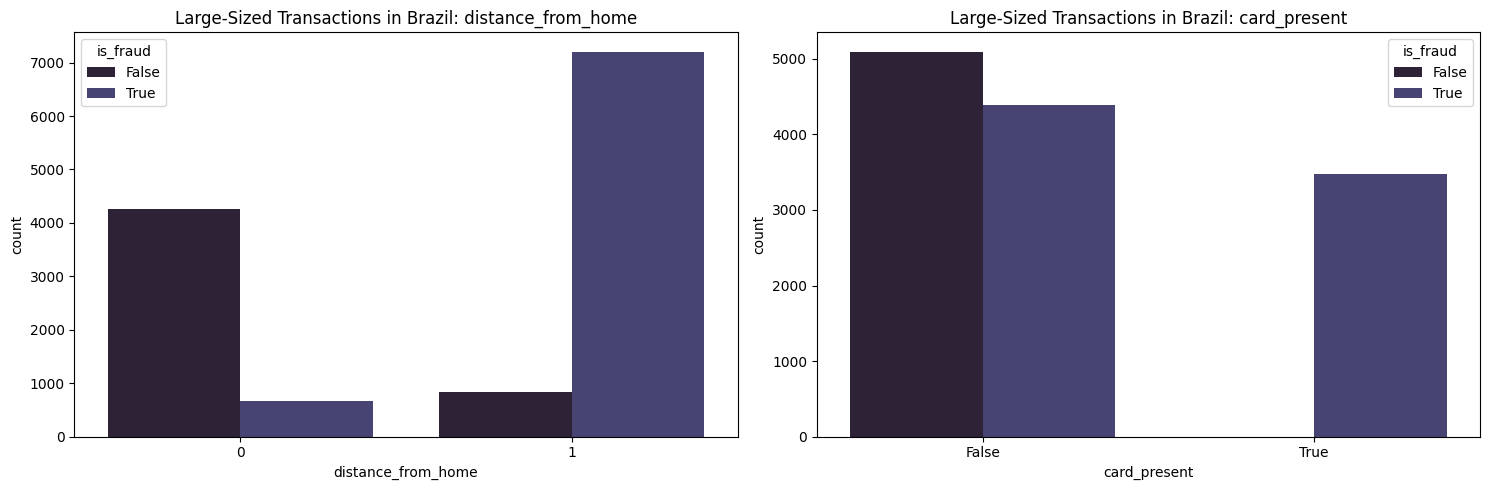

In [40]:
# Filter the dataset to isolate transactions in Brazil with an abnormally high amount
# Abnormal transactions are defined as transactions with an amount greater than 3811
brazil_high_amount = df_copy[(df_copy['country'] == 'Brazil') & (df_copy['amount'] > 3000)]

# Print the total count of abnormal transactions in Brazil
print(f'Number of abnormal transactions in Brazil: {brazil_high_amount.shape[0]}')

# Specify the columns to visualize: 'distance_from_home' and 'card_present'
cols = ['distance_from_home', 'card_present']

# Visualization setup: Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loop through each column to generate a bar plot for large-sized transactions in Brazil
for i, col in enumerate(cols):
    # Group the data by the column and fraud status, count the occurrences, and reset the index
    tmp_data = brazil_high_amount[[col, 'is_fraud']].value_counts().reset_index()
    tmp_data.columns = [col, 'is_fraud', 'count']  # Rename columns for clarity

    # Create a bar plot using seaborn, distinguishing fraud status with different colors
    sns.barplot(data=tmp_data, x=col, y='count', hue='is_fraud', palette=sns.color_palette('mako'), ax=axes[i])

    # Set the title for each subplot
    axes[i].set_title(f'Large-Sized Transactions in Brazil: {col}')

# Adjust layout to ensure proper spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


Number of abnormal transactions in Russia: 11948


<ipython-input-41-bef3f63b8a8d>:21: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(
<ipython-input-41-bef3f63b8a8d>:21: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(


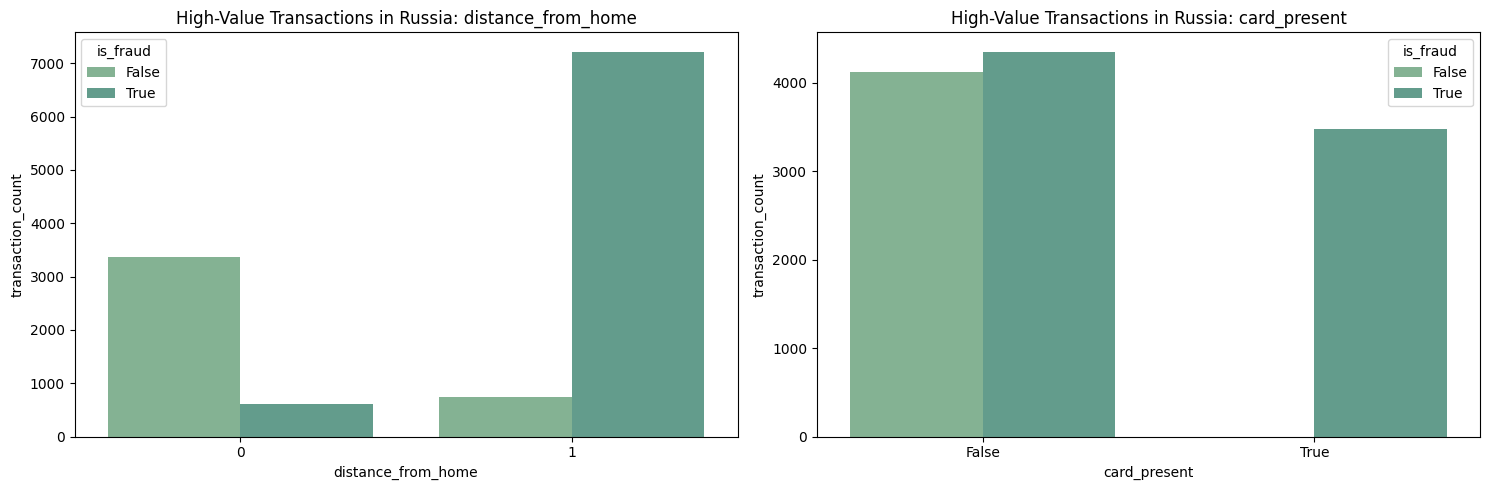

In [41]:
high_value_russia_transactions = df_copy[(df_copy['country'] == 'Russia') & (df_copy['amount'] > 50000)]

# Step 2: Print the total count of abnormal transactions in Russia
print(f'Number of abnormal transactions in Russia: {high_value_russia_transactions.shape[0]}')

# Step 3: Specify columns for visualization
# These columns represent important transaction attributes to analyze
transaction_attributes = ['distance_from_home', 'card_present']

# Step 4: Set up the visualization layout
# Create subplots with 1 row and 2 columns for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Step 5: Loop through each attribute and generate a bar plot
for idx, attribute in enumerate(transaction_attributes):
    # Group data by the attribute and fraud status, count occurrences, and reset the index
    grouped_data = high_value_russia_transactions[[attribute, 'is_fraud']].value_counts().reset_index()
    grouped_data.columns = [attribute, 'is_fraud', 'transaction_count']  # Rename columns for clarity

    # Create a bar plot using seaborn
    sns.barplot(
        data=grouped_data,
        x=attribute,
        y='transaction_count',
        hue='is_fraud',
        palette=sns.color_palette('crest'),
        ax=axes[idx]
    )

    # Set the title for the subplot
    axes[idx].set_title(f'High-Value Transactions in Russia: {attribute}')

# Step 6: Adjust layout to prevent overlapping elements
plt.tight_layout()

# Step 7: Display the plots
plt.show()


Number of abnormal transactions in Nigeria: 11858


<ipython-input-42-f887b6f3f36e>:19: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=tmp_data, x=col, y='count', hue='is_fraud', palette=sns.color_palette('rocket'), ax=axes[i])
<ipython-input-42-f887b6f3f36e>:19: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=tmp_data, x=col, y='count', hue='is_fraud', palette=sns.color_palette('rocket'), ax=axes[i])


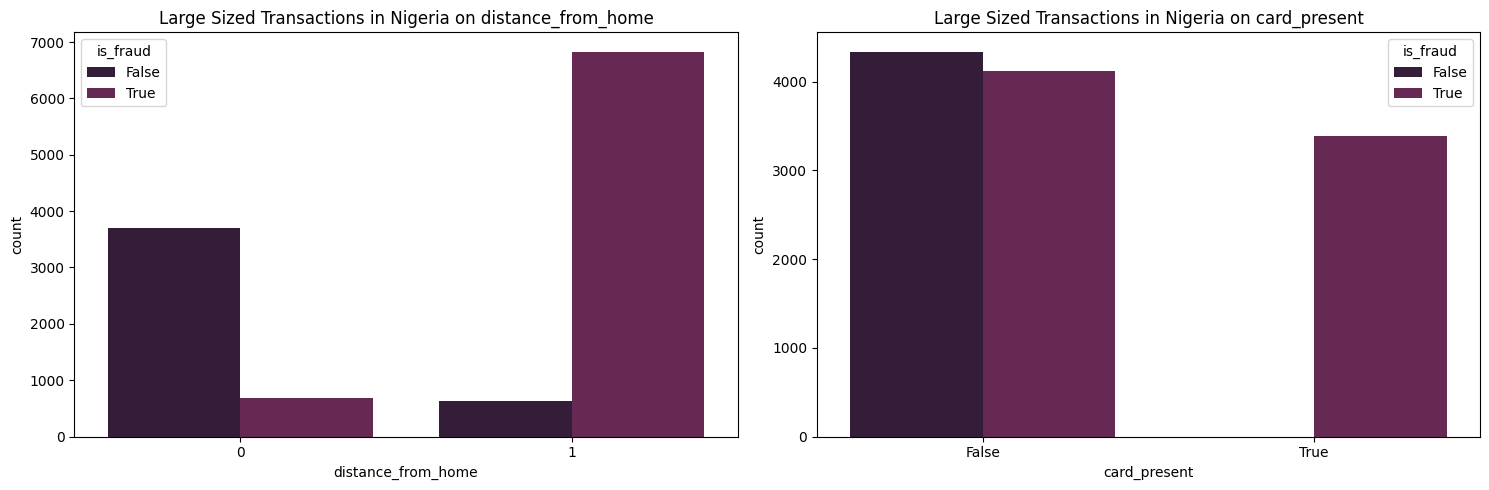

In [42]:
# Filter transactions from Nigeria where the transaction amount is greater than the defined threshold
nigeria_high_amount = df_copy[(df_copy['country'] == 'Nigeria') & (df_copy['amount'] > 300000)]

# Print the number of abnormal transactions in Nigeria with amounts exceeding the threshold
print(f'Number of abnormal transactions in Nigeria: {nigeria_high_amount.shape[0]}')

# List of columns to visualize: distance_from_home and card_present
cols = ['distance_from_home', 'card_present']

## Visualisation: Create a subplot with 1 row and 2 columns for the specified features
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loop through each column to create a bar plot for large-sized transactions in Nigeria
for i, col in enumerate(cols):
    # Count the occurrences of each combination of feature value and fraud status, then reset index
    tmp_data = nigeria_high_amount[[col, 'is_fraud']].value_counts().reset_index()

    # Create the bar plot using seaborn, with different colors based on fraud status
    sns.barplot(data=tmp_data, x=col, y='count', hue='is_fraud', palette=sns.color_palette('rocket'), ax=axes[i])

    # Set the title for each subplot
    axes[i].set_title(f'Large Sized Transactions in Nigeria on {col}')

# Adjust layout to avoid overlapping of elements and show the plot
plt.tight_layout()
plt.show()


Number of abnormal transactions in Mexico: 11371


<ipython-input-43-8d10a4641b12>:21: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(
<ipython-input-43-8d10a4641b12>:21: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(


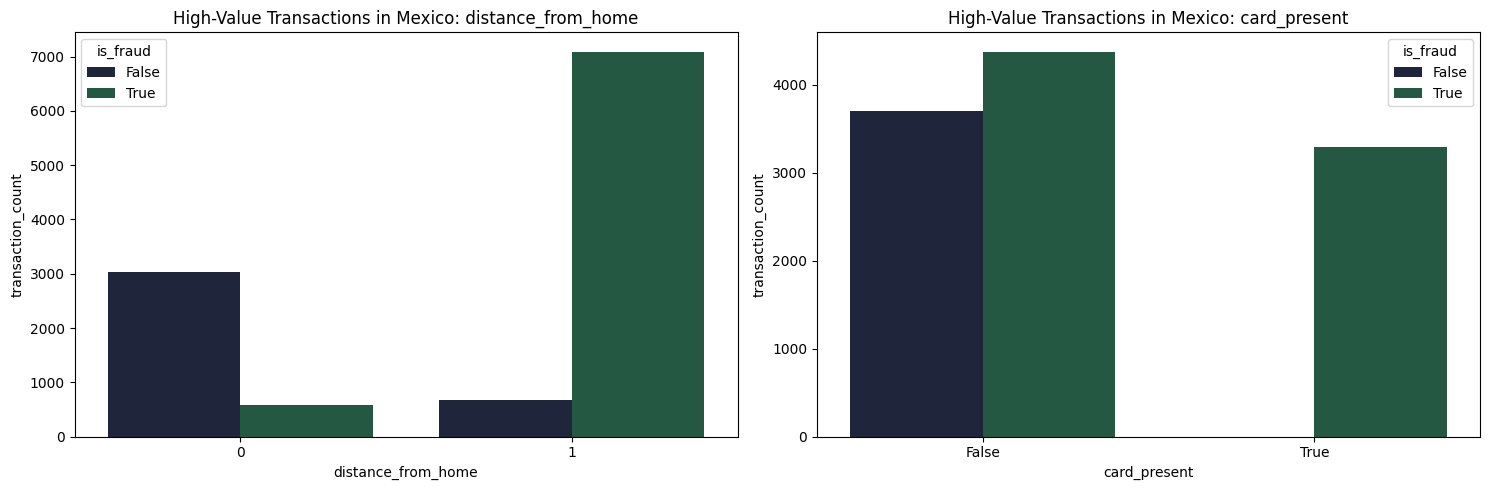

In [43]:

high_value_mexico_transactions = df_copy[(df_copy['country'] == 'Mexico') & (df_copy['amount'] > 14000)]

# Step 2: Print the total count of abnormal transactions in Mexico
print(f'Number of abnormal transactions in Mexico: {high_value_mexico_transactions.shape[0]}')

# Step 3: Specify columns for visualization
# These columns represent key transaction attributes to analyze
transaction_features = ['distance_from_home', 'card_present']

# Step 4: Set up the visualization layout
# Create subplots with 1 row and 2 columns for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Step 5: Loop through each feature and generate a bar plot
for idx, feature in enumerate(transaction_features):
    # Group data by the feature and fraud status, count occurrences, and reset the index
    feature_data = high_value_mexico_transactions[[feature, 'is_fraud']].value_counts().reset_index()
    feature_data.columns = [feature, 'is_fraud', 'transaction_count']  # Rename columns for clarity

    # Create a bar plot using seaborn
    sns.barplot(
        data=feature_data,
        x=feature,
        y='transaction_count',
        hue='is_fraud',
        palette=sns.color_palette('cubehelix'),
        ax=axes[idx]
    )

    # Set the title for the subplot
    axes[idx].set_title(f'High-Value Transactions in Mexico: {feature}')

# Step 6: Adjust layout to prevent overlapping elements
plt.tight_layout()

# Step 7: Display the plots
plt.show()


             device  is_fraud    amount
0       Android App     False   903.430
1       Android App      True  5419.450
2       Chip Reader      True  5600.480
3            Chrome     False   997.735
4            Chrome      True  5238.820
5              Edge     False   843.080
6              Edge      True  6256.180
7           Firefox     False   882.150
8           Firefox      True  5943.260
9   Magnetic Stripe      True  5774.285
10      NFC Payment      True  6327.515
11           Safari     False   854.995
12           Safari      True  5844.355
13          iOS App     False   954.320
14          iOS App      True  5209.350


<ipython-input-44-27d59cadfb66>:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(


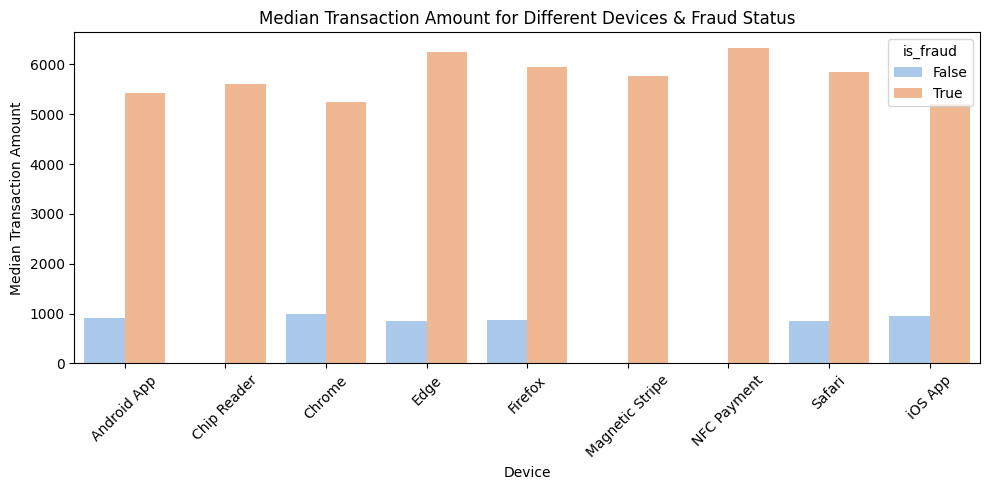

In [44]:
# Step 1: Calculate the median transaction amount for each device and fraud status
# Group the data by 'device' and 'is_fraud', then calculate the median of 'amount'
median_transaction_by_device = df_copy.groupby(['device', 'is_fraud'])[['amount']].median().reset_index()

# Step 2: Display the resulting DataFrame
# This shows the median transaction amount for each combination of device and fraud status
print(median_transaction_by_device)

# Step 3: Set up the visualization layout
# Create a figure with specified size
plt.figure(figsize=(10, 5))

# Step 4: Create a bar plot
# Plot median transaction amounts for different devices and fraud statuses
sns.barplot(
    data=median_transaction_by_device,
    x='device',
    y='amount',
    hue='is_fraud',
    palette=sns.color_palette('pastel')  # Use a pastel color palette for better readability
)

# Step 5: Customize plot aesthetics
plt.title('Median Transaction Amount for Different Devices & Fraud Status')  # Set the title
plt.ylabel('Median Transaction Amount')  # Set the y-axis label
plt.xlabel('Device')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Step 6: Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [45]:
# Step 1: Calculate the median transaction amount for each transaction hour and fraud status
# Group the data by 'transaction_hour' and 'is_fraud', then calculate the median of 'amount'
median_transaction_by_hour = df_copy.groupby(['hour', 'is_fraud'])[['amount']].median().reset_index()

# Step 2: Display the resulting DataFrame
# This shows the median transaction amount for each combination of transaction hour and fraud status
print(median_transaction_by_hour)

    hour  is_fraud    amount
0      0     False   891.515
1      0      True  6138.250
2      1     False   944.300
3      1      True  5907.570
4      2     False   974.195
5      2      True  5593.040
6      3     False   890.785
7      3      True  5931.430
8      4     False   926.255
9      4      True  6047.720
10     5     False   929.870
11     5      True  5980.835
12     6     False   901.405
13     6      True  4879.930
14     7     False   884.740
15     7      True  4748.800
16     8     False   901.300
17     8      True  5089.685
18     9     False   878.580
19     9      True  5255.290
20    10     False   825.515
21    10      True  6538.010
22    11     False   855.685
23    11      True  5144.460
24    12     False   939.730
25    12      True  4201.445
26    13     False   925.330
27    13      True  5520.765
28    14     False   866.070
29    14      True  5075.190
30    15     False   891.080
31    15      True  6597.800
32    16     False   909.750
33    16      

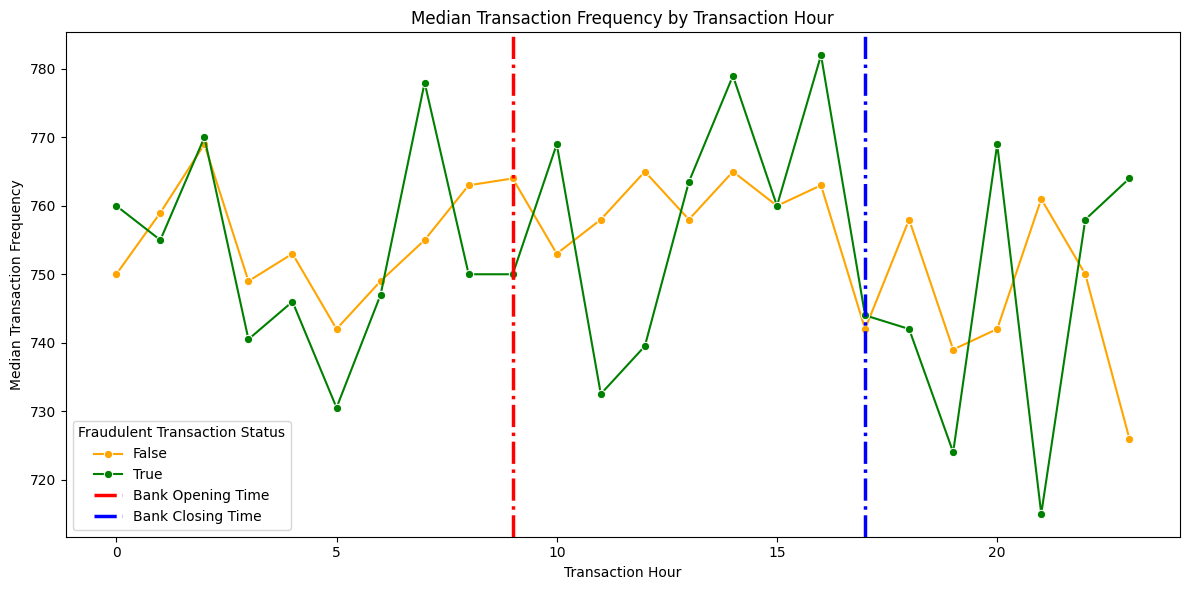

In [46]:
# Step 1: Group the data by transaction hour and fraud status, and calculate the median number of transactions
hourly_transaction_frequency = df_copy.groupby(['hour', 'is_fraud'])[['num_transactions']].agg('median').reset_index()

# Step 2: Display the result of the group-by operation
hourly_transaction_frequency  # This will show the median number of transactions for each hour by fraud statu


# Step 1: Visualize the median transaction frequency across transaction hours
plt.figure(figsize=(12, 6))  # Set the figure size for clarity and better presentation

# Step 2: Create a line plot for transaction frequency
# Use a line plot to visualize trends in the median number of transactions by transaction hour and fraud status
sns.lineplot(
    data=hourly_transaction_frequency,  # Data to plot
    x='hour',
    y='num_transactions',
    hue='is_fraud',  # Separate fraud and non-fraud transactions using color
    linestyle='-',
    marker='o',  # Add markers at each data point
    palette=['orange', 'green']  # Set colors for fraud and non-fraud trends
)

# Step 3: Add vertical lines for bank's operating hours
plt.axvline(x=9, color='red', linestyle='-.', linewidth=2.5, label='Bank Opening Time')  # Bank opening time at 9 AM
plt.axvline(x=17, color='blue', linestyle='-.', linewidth=2.5, label='Bank Closing Time')  # Bank closing time at 5 PM

# Step 4: Customize plot with legend and labels
plt.legend(title='Fraudulent Transaction Status')  # Set the legend title
plt.title('Median Transaction Frequency by Transaction Hour')  # Title for the plot
plt.xlabel('Transaction Hour')  # X-axis label
plt.ylabel('Median Transaction Frequency')  # Y-axis label

# Step 5: Adjust layout and show the plot
plt.tight_layout()  # Prevent overlapping of elements
plt.show()  # Display the plot


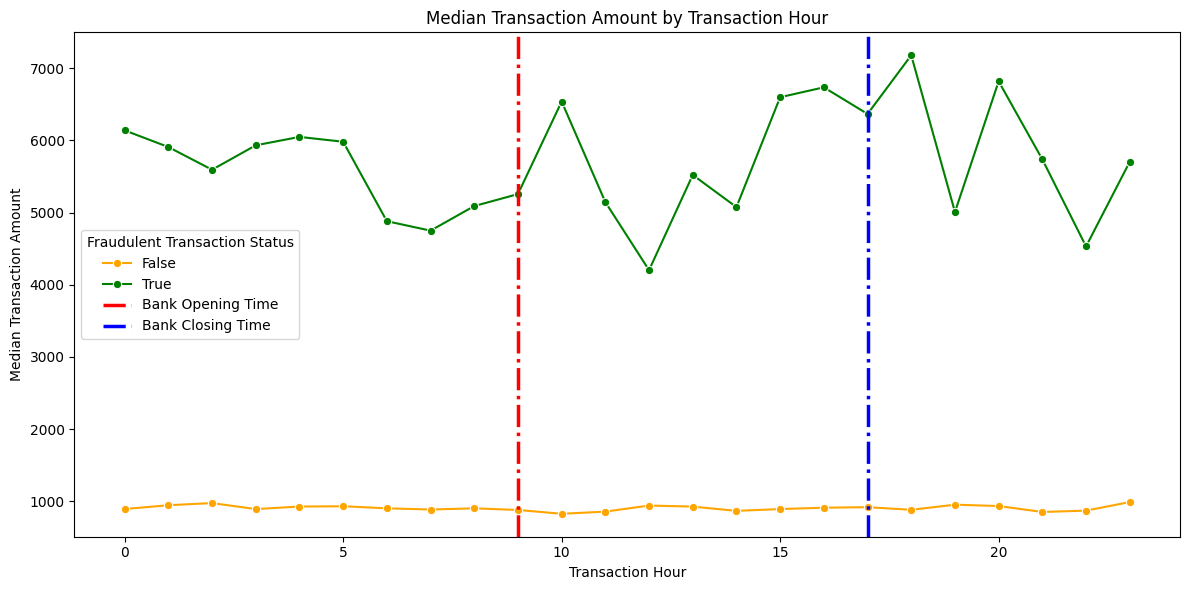

In [47]:
# Step 1: Visualize the median transaction amount across transaction hours
plt.figure(figsize=(12, 6))  # Set the figure size for better clarity

# Step 2: Create a line plot
# Use a line plot to show trends in the median transaction amount by transaction hour and fraud status
sns.lineplot(
    data=median_transaction_by_hour,
    x='hour',
    y='amount',
    hue='is_fraud',
    linestyle='-',
    marker='o',
    palette=['orange', 'green']  # Use distinct colors for fraud and non-fraud trends
)

# Step 3: Add vertical reference lines
# Mark the bank's opening and closing hours for context
plt.axvline(x=9, color='red', linestyle='-.', linewidth=2.5, label='Bank Opening Time')  # Bank opening time
plt.axvline(x=17, color='blue', linestyle='-.', linewidth=2.5, label='Bank Closing Time')  # Bank closing time

# Step 4: Add legend and labels
plt.legend(title='Fraudulent Transaction Status')  # Set the legend title
plt.title('Median Transaction Amount by Transaction Hour')  # Set the plot title
plt.xlabel('Transaction Hour')  # Label the x-axis
plt.ylabel('Median Transaction Amount')  # Label the y-axis

# Step 5: Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [48]:
df[selected_feature_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   unique_countries    300000 non-null  int64  
 1   unique_merchants    300000 non-null  int64  
 2   high_risk_merchant  300000 non-null  int64  
 3   merchant_category   300000 non-null  int64  
 4   total_amount        300000 non-null  float64
 5   microsecond         300000 non-null  int32  
 6   card_type           300000 non-null  int64  
 7   device              300000 non-null  int64  
 8   country             300000 non-null  int64  
 9   minute              300000 non-null  int32  
 10  city_size           300000 non-null  int64  
 11  channel             300000 non-null  int64  
 12  amount              300000 non-null  float64
 13  day                 300000 non-null  int32  
 14  month               300000 non-null  int32  
 15  day_of_week         300000 non-nul

In [49]:
# Select the relevant feature columns for the model
X_features = df[selected_feature_cols]  # Assuming 'selected_features' is the column list

# Drop the target variable 'is_fraud' and 'year' columns from the feature set
X_features.drop(columns=['is_fraud'], axis=1, inplace=True)

# Set the target variable as 'is_fraud'
y_target = df['is_fraud']

# Split the dataset into training and testing sets
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(
    X_features, y_target, test_size=0.2, stratify=y_target, random_state=97
)

# Print the shape of the training and testing datasets
print(X_train_data.shape, X_test_data.shape, y_train_data.shape, y_test_data.shape)


(240000, 19) (60000, 19) (240000,) (60000,)


<ipython-input-49-8797e236898d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_features.drop(columns=['is_fraud'], axis=1, inplace=True)


In [50]:
from sklearn.preprocessing import MinMaxScaler

## Use of MinMaxScaler to Scale data
scaler = MinMaxScaler()
X_train_data = scaler.fit_transform(X_train_data)
X_test_data = scaler.transform(X_test_data)

In [51]:
from sklearn.metrics import classification_report, recall_score, roc_auc_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_classification_model(classifier, train_features, test_features, train_labels, test_labels):
    # Train the model on the training data
    classifier.fit(train_features, train_labels)

    # Predict on the test data
    predictions = classifier.predict(test_features)

    # Print classification report
    print("\nClassification Report: \n", classification_report(test_labels, predictions))
    print(f"Recall Score: {recall_score(test_labels, predictions)}")
    print(f"AUC Score: {roc_auc_score(test_labels, predictions)}")
    print(f"F1-Score: {f1_score(test_labels, predictions)}")
    print('')

    # Calculate predicted probabilities for ROC curve
    predicted_probabilities = classifier.predict_proba(test_features)[:, 1]

    # Compute ROC curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, predicted_probabilities)
    roc_auc_value = auc(false_positive_rate, true_positive_rate)

    # Plot ROC curve
    plt.figure()
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_value:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Compute confusion matrix
    conf_matrix = confusion_matrix(test_labels, predictions, labels=classifier.classes_)

    # Display confusion matrix
    matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=classifier.classes_)
    matrix_display.plot()
    plt.show()


Evaluating Random Forest Classifier


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     45176
           1       0.94      0.90      0.92     14824

    accuracy                           0.96     60000
   macro avg       0.95      0.94      0.95     60000
weighted avg       0.96      0.96      0.96     60000

Recall Score: 0.8950350782514841
AUC Score: 0.9385083306964875
F1-Score: 0.9180101017089878



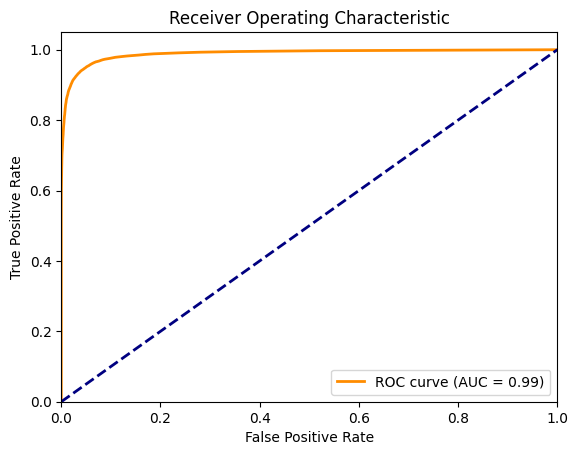

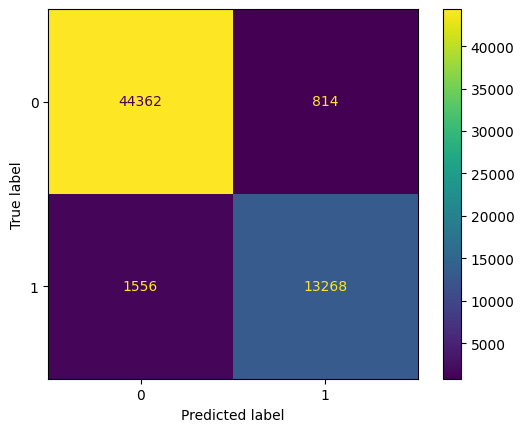

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier with 100 estimators and a fixed random seed
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Print heading for evaluation
print(f'Evaluating Random Forest Classifier\n')

# Evaluate the model using the previously defined evaluation function
evaluate_classification_model(random_forest_classifier, X_train_data, X_test_data, y_train_data, y_test_data)


Evaluating Gradient Boosting Classifier


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     45176
           1       0.96      0.92      0.94     14824

    accuracy                           0.97     60000
   macro avg       0.97      0.95      0.96     60000
weighted avg       0.97      0.97      0.97     60000

Recall Score: 0.9180383162439287
AUC Score: 0.953286025485166
F1-Score: 0.9401402369520915



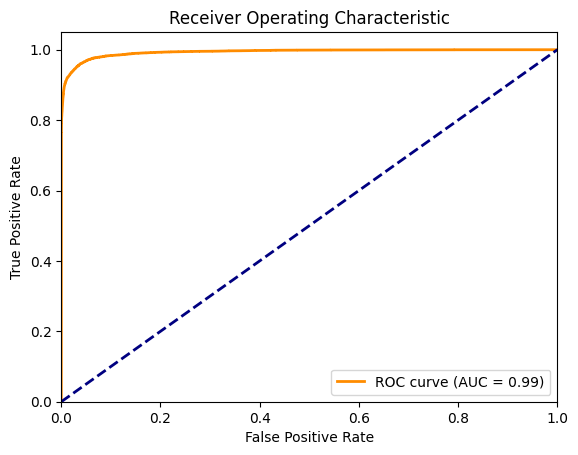

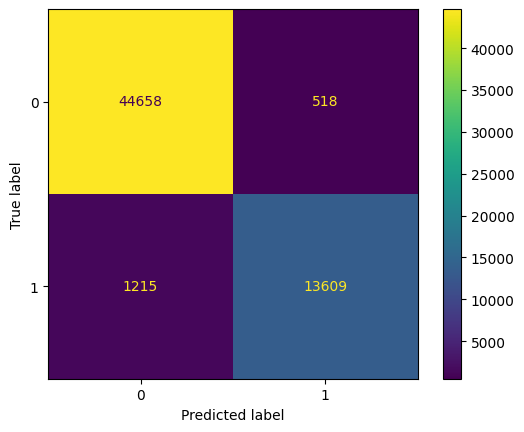

In [53]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Initialize the Gradient Boosting classifier with 100 estimators and a fixed random seed
gradient_boosting_classifier = HistGradientBoostingClassifier(random_state=42)

# Print heading for evaluation
print(f'Evaluating Gradient Boosting Classifier\n')

# Evaluate the model using the previously defined evaluation function
evaluate_classification_model(gradient_boosting_classifier, X_train_data, X_test_data, y_train_data, y_test_data)


Evaluating Decision Tree Classifier


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     45176
           1       0.92      0.92      0.92     14824

    accuracy                           0.96     60000
   macro avg       0.95      0.95      0.95     60000
weighted avg       0.96      0.96      0.96     60000

Recall Score: 0.9226254722072316
AUC Score: 0.9473783461620539
F1-Score: 0.9191532258064516



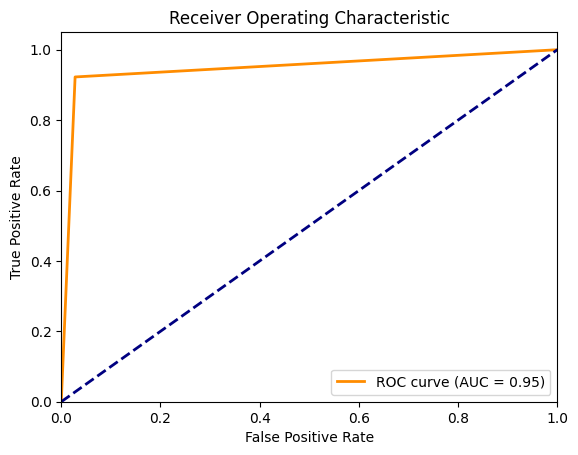

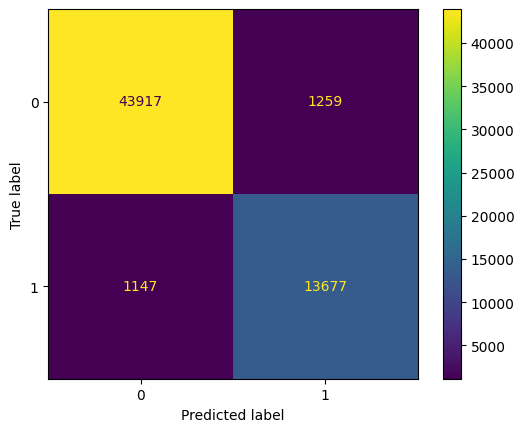

In [54]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier with a fixed random seed for reproducibility
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Print heading for evaluation
print(f'Evaluating Decision Tree Classifier\n')

# Evaluate the model using the previously defined evaluation function
evaluate_classification_model(decision_tree_classifier, X_train_data, X_test_data, y_train_data, y_test_data)


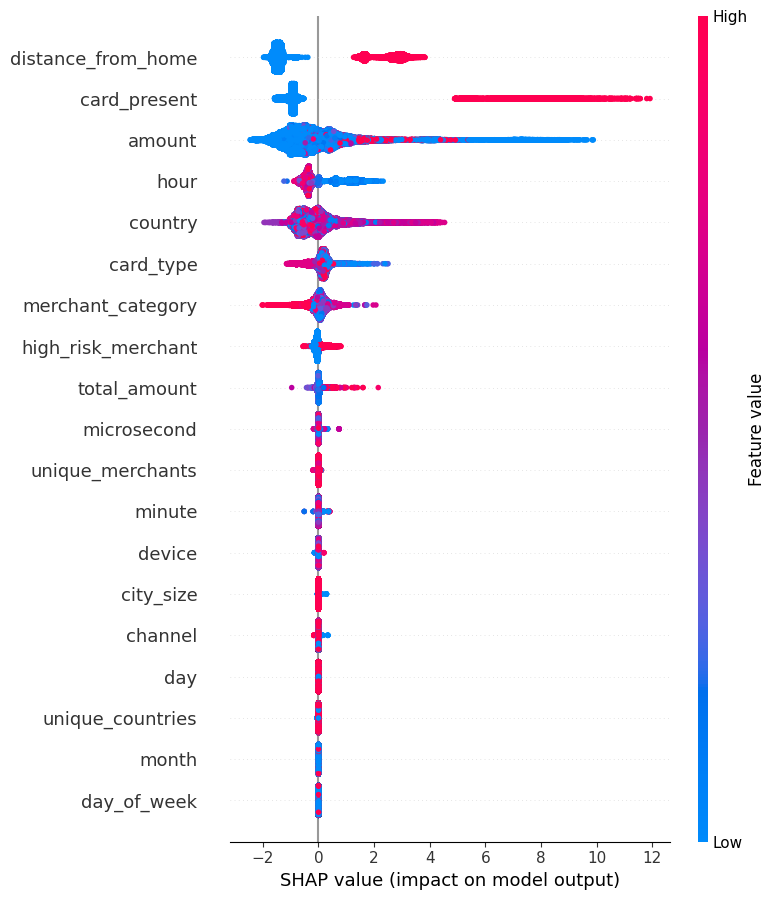

In [55]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(gradient_boosting_classifier)

feature_names = ["unique_countries", "unique_merchants", "high_risk_merchant", "merchant_category", "total_amount", "microsecond", "card_type" ,"device", "country",
                 "minute", "city_size", "channel", "amount", "day", "month", "day_of_week", "hour", "card_present", "distance_from_home",
                 "is_fraud" ]

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_data)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test_data, feature_names)